We will use the daily data from cnecovid.

In [1]:
!wget -N https://cnecovid.isciii.es/covid19/resources/datos_ccaas.csv

--2020-09-18 16:11:15--  https://cnecovid.isciii.es/covid19/resources/datos_ccaas.csv
Resolving cnecovid.isciii.es (cnecovid.isciii.es)... 193.146.50.165
Connecting to cnecovid.isciii.es (cnecovid.isciii.es)|193.146.50.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 114498 (112K) [application/octet-stream]
Saving to: ‘datos_ccaas.csv’

datos_ccaas.csv     100%[===================>] 111.81K  --.-KB/s    in 0.1s    

2020-09-18 16:11:15 (984 KB/s) - ‘datos_ccaas.csv’ saved [114498/114498]



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [2]:
import pandas as pd
import numpy  as np

from pyearth import Earth
from pyearth import export

#from jupyterthemes import jtplot
#jtplot.style(theme='onedork')

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [3]:
df = pd.read_csv('datos_ccaas.csv', keep_default_na=False, na_values='', parse_dates=[1])
df.head(10)

ccaa_iso      fecha  num_casos  num_casos_prueba_pcr  \
0       AN 2020-01-31          0                     0   
1       AR 2020-01-31          0                     0   
2       AS 2020-01-31          0                     0   
3       CB 2020-01-31          0                     0   
4       CE 2020-01-31          0                     0   
5       CL 2020-01-31          0                     0   
6       CM 2020-01-31          0                     0   
7       CN 2020-01-31          0                     0   
8       CT 2020-01-31          1                     1   
9       EX 2020-01-31          0                     0   

   num_casos_prueba_test_ac  num_casos_prueba_otras  \
0                         0                       0   
1                         0                       0   
2                         0                       0   
3                         0                       0   
4                         0                       0   
5                         0                       0   
6                         0                       0   
7                         0                       0   
8                         0                       0   
9                         0                       0   

   num_casos_prueba_desconocida  
0                             0  
1                             0  
2                             0  
3                             0  
4                             0  
5                             0  
6                             0  
7                             0  
8                             0  
9                             0

In [4]:
df_loc = pd.read_excel('SPANISH-CODES.xlsx', sheet_name='CCAA', keep_default_na=False, na_values='')
df_loc['COD_CCAA'] = df_loc['COD_CCAA'].apply(str.strip)
df_loc

COD_CCAA                     CCAA        LAT          LONG
0        AN                Andalucía  37.746222 -4.554982e+00
1        AR                   Aragón  41.655767 -8.993490e-01
2        AS  Asturias, Principado de  43.339126 -5.835657e+00
3        CN                 Canarias  28.472316 -1.629854e+01
4        CB                Cantabria  43.465773 -3.834682e+00
5        CM       Castilla-La Mancha  39.918263 -3.966983e+00
6        CL          Castilla y León  41.657179 -4.718616e+00
7        CT               Catalunya​  41.440183  2.146459e+00
8        EX              Extremadura  39.191439 -6.128023e+00
9        GA                 Galicia​  42.883738 -8.509078e+00
10       IB            Illes Balears  39.577944  2.650378e+00
11       RI                 La Rioja  42.454080 -2.438287e+06
12       MD      Comunidad de Madrid  40.422451 -3.697740e+00
13       MC         Región de Murcia  38.029986 -1.125442e+00
14       NC                  Navarra  42.837333 -1.637375e+00
15       PV               País Vasco  42.851582 -2.658177e+00
16       VC     Comunidad Valenciana  39.482401 -3.724340e-01
17       CE                    Ceuta  35.891943 -5.321092e+00
18       ML                  Melilla  35.298177 -2.938964e+00

Last check of our source dataframe.

In [5]:
df.count()

ccaa_iso                        4408
fecha                           4408
num_casos                       4408
num_casos_prueba_pcr            4408
num_casos_prueba_test_ac        4408
num_casos_prueba_otras          4408
num_casos_prueba_desconocida    4408
dtype: int64

We pivot to a country by column format.

In [6]:
df_geo = df.pivot(index='fecha', columns='ccaa_iso', values=['num_casos'])
df_geo

num_casos                                                      \
ccaa_iso          AN   AR AS CB CE   CL   CM  CN   CT   EX   GA  IB   MC   
fecha                                                                      
2020-01-31         0    0  0  0  0    0    0   0    1    0    0   0    0   
2020-02-01         2    0  0  0  0    0    0   0    8    0    1   0    0   
2020-02-02         2    0  0  0  0    1    0   1    3    2    1   0    0   
2020-02-03         1    0  0  0  0    1    0   0    3    0    1   0    0   
2020-02-04         1    0  0  0  0    1    0   1    4    0    1   0    0   
...              ...  ... .. .. ..  ...  ...  ..  ...  ...  ...  ..  ...   
2020-09-14       323  138  2  0  2  233  245  68  754  166  137  43  160   
2020-09-15       419  170  1  0  3  410  246  72  845  113  187  47  121   
2020-09-16       326  201  0  0  0   46   99  58   93  117  106   6   54   
2020-09-17         0    0  0  0  0    0    1  13    0    0    1   0   16   
2020-09-18         0    0  0  0  0    0    0   0    0    0    0   0    0   

                                       
ccaa_iso      MD ML   NC  PV  RI   VC  
fecha                                  
2020-01-31     4  0    0   0   0    4  
2020-02-01     8  0    0   0   0    1  
2020-02-02     6  0    0   0   0    0  
2020-02-03     7  0    0   0   1    5  
2020-02-04     3  0    1   0   0    1  
...          ... ..  ...  ..  ..  ...  
2020-09-14  1705  3  138  47  45  154  
2020-09-15  3441  1  134   5  30   81  
2020-09-16  1565  1  100   4  47   35  
2020-09-17     3  0    1   0   1    0  
2020-09-18     2  0    0   0   0    0  

[232 rows x 19 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we add to the current range and check our latest date.

In [7]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

num_casos                                                         \
ccaa_iso          AN   AR   AS   CB   CE   CL   CM   CN   CT   EX   GA   IB   
2020-01-31       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2020-02-01       2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  8.0  0.0  1.0  0.0   
2020-02-02       2.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  3.0  2.0  1.0  0.0   
2020-02-03       1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  3.0  0.0  1.0  0.0   
2020-02-04       1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  4.0  0.0  1.0  0.0   
...              ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2021-09-14       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2021-09-15       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2021-09-16       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2021-09-17       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2021-09-18       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

                                               
ccaa_iso     MC   MD   ML   NC   PV   RI   VC  
2020-01-31  0.0  4.0  0.0  0.0  0.0  0.0  4.0  
2020-02-01  0.0  8.0  0.0  0.0  0.0  0.0  1.0  
2020-02-02  0.0  6.0  0.0  0.0  0.0  0.0  0.0  
2020-02-03  0.0  7.0  0.0  0.0  0.0  1.0  5.0  
2020-02-04  0.0  3.0  0.0  1.0  0.0  0.0  1.0  
...         ...  ...  ...  ...  ...  ...  ...  
2021-09-14  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-09-15  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-09-16  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-09-17  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
2021-09-18  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[597 rows x 19 columns]

We need numerical data as inputs for a model, so we add a column representing the date as days since the start of the index.

In [8]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    597.000000
mean     298.000000
std      172.483333
min        0.000000
25%      149.000000
50%      298.000000
75%      447.000000
max      596.000000
Name: daynum, dtype: float64

We create a simple dataframe to contain the source values for our fitting approach. The typical progress of an outbreak seems to fit a Gumbel distribution, where the cumulative distribution is a double negative exponent: `exp(-exp(-x))`. The measures are averaged by week to smooth out reporting lags.

In [9]:
def gumpdf(x, beta, mu):
    """Return PDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(expon) * np.exp(- (np.exp(expon))) / beta)

def gumcdf(x, beta, mu):
    """Return CDF value according to Gumbel"""
    expon = - ((x - mu) / beta)
    return(np.exp(- (np.exp(expon))))

In [10]:
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

Running multiple wave analysis for Andalucía (AN)
Minimum number of cases is 2
Wave 01 beta 10.296 mu  52 fit 0.845 peak 2020-03-23 from 2020-02-29 to 2020-06-06 size 14796
Wave 02 beta  3.630 mu  89 fit 0.804 peak 2020-04-29 from 2020-04-22 to 2020-05-21 size 1321
Wave 03 beta  3.566 mu  78 fit 0.606 peak 2020-04-18 from 2020-04-11 to 2020-05-07 size 698
Wave 04 beta  5.391 mu 158 fit 0.783 peak 2020-07-07 from 2020-06-28 to 2020-07-30 size 363
Wave 05 beta  8.144 mu 173 fit 0.799 peak 2020-07-22 from 2020-07-06 to 2020-09-04 size 1688
Wave 06 beta  6.771 mu 214 fit 0.899 peak 2020-09-02 from 2020-08-17 to 2020-10-30 size 33554
Wave 07 beta 13.258 mu 196 fit 0.387 peak 2020-08-14 from 2020-07-16 to 2020-11-16 size 14610
--- no data for wave
Running multiple wave analysis for Aragón (AR)
Minimum number of cases is 2
Wave 01 beta 11.117 mu  54 fit 0.868 peak 2020-03-25 from 2020-03-02 to 2020-06-03 size 5513
Wave 02 beta  9.195 mu  87 fit 0.674 peak 2020-04-27 from 2020-04-11 to 2020-06

Wave 04 beta 13.448 mu  38 fit 0.615 peak 2020-03-09 from 2020-02-21 to 2020-04-09 size 146
Wave 05 beta  5.554 mu 191 fit 0.844 peak 2020-08-09 from 2020-07-29 to 2020-09-07 size 972
Wave 06 beta  7.415 mu 203 fit 0.878 peak 2020-08-21 from 2020-08-06 to 2020-10-04 size 2706
Wave 07 beta  6.458 mu 210 fit 0.831 peak 2020-08-28 from 2020-08-15 to 2020-10-06 size 2499
Wave 08 beta  6.516 mu 220 fit 0.951 peak 2020-09-07 from 2020-08-25 to 2020-10-14 size 1890
Wave 09 beta  4.750 mu 226 fit 0.804 peak 2020-09-13 from 2020-09-04 to 2020-10-10 size 1306
--- no data left
Running multiple wave analysis for Illes Balears (IB)
Minimum number of cases is 2
Wave 01 beta  9.344 mu  52 fit 0.819 peak 2020-03-23 from 2020-03-04 to 2020-05-13 size 2063
Wave 02 beta  4.087 mu  50 fit 0.502 peak 2020-03-21 from 2020-03-15 to 2020-04-02 size 73
Wave 03 beta  5.329 mu 109 fit 0.741 peak 2020-05-19 from 2020-05-12 to 2020-06-04 size 99
Wave 04 beta  5.549 mu 125 fit 0.750 peak 2020-06-04 from 2020-05-29 

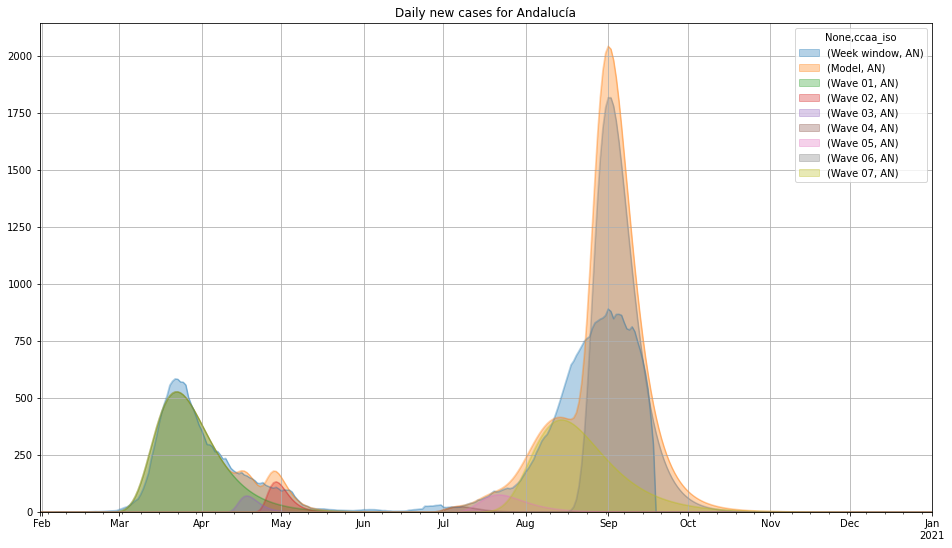

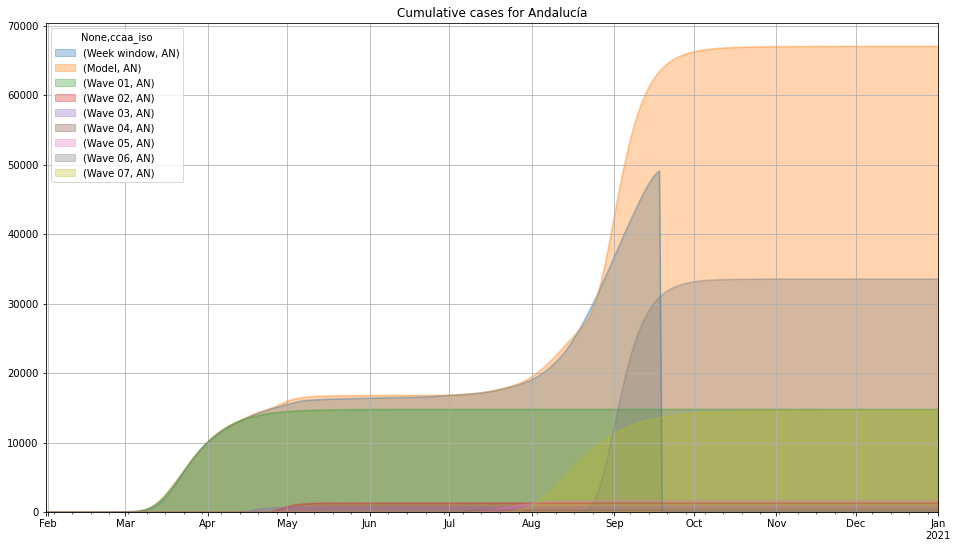

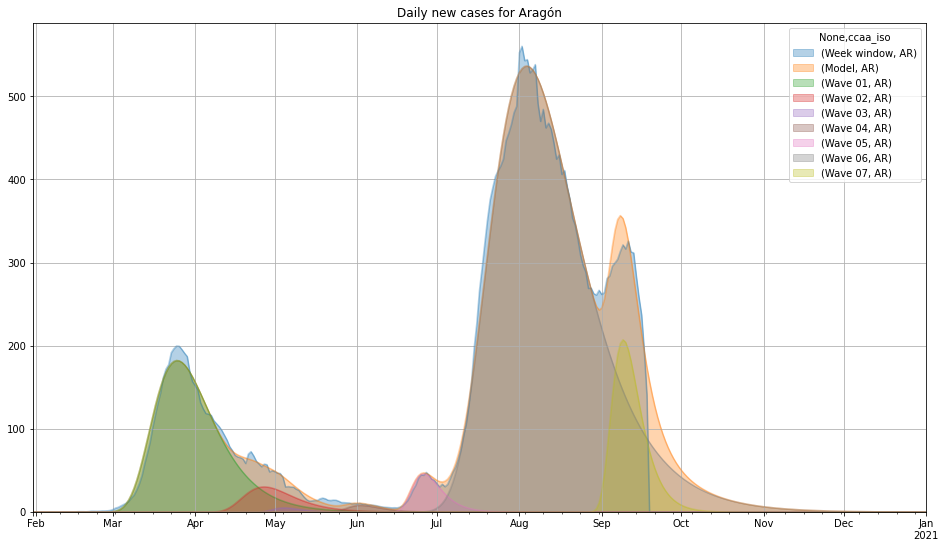

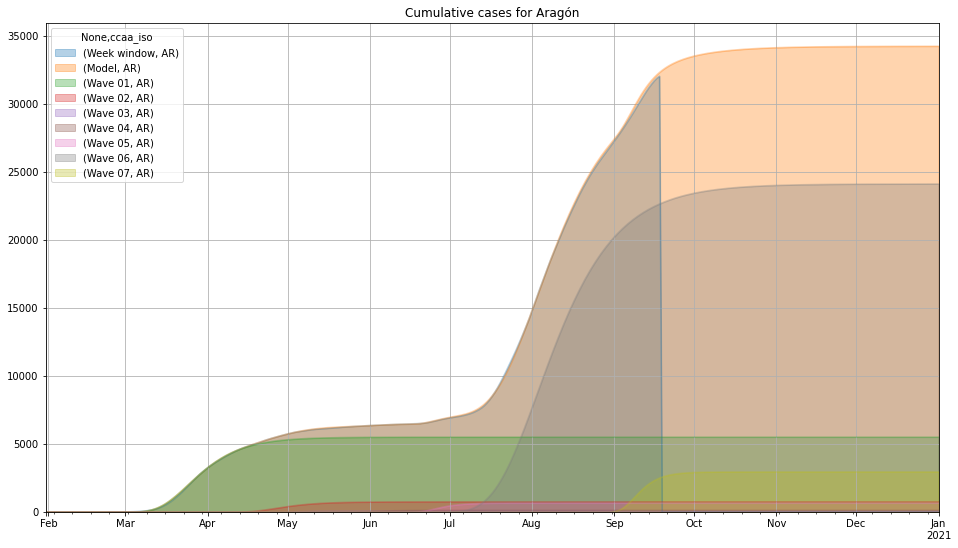

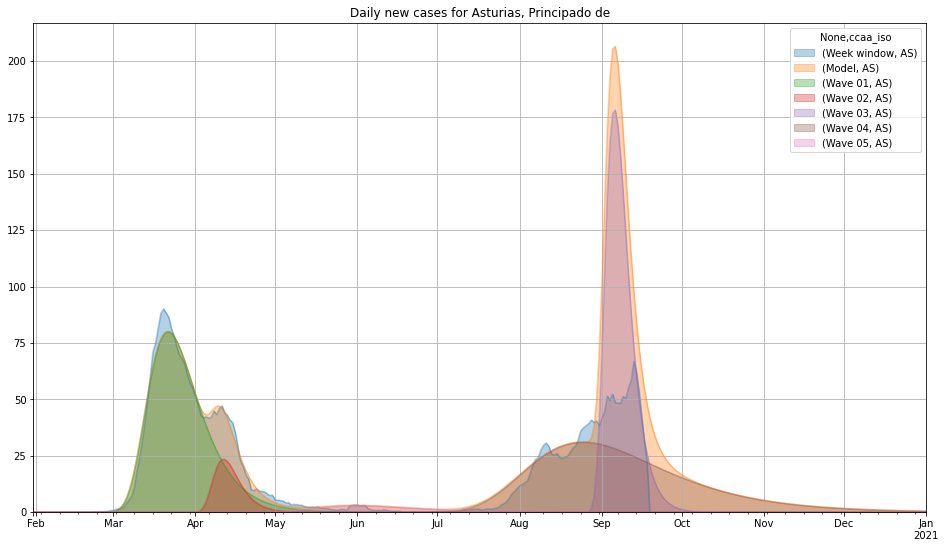

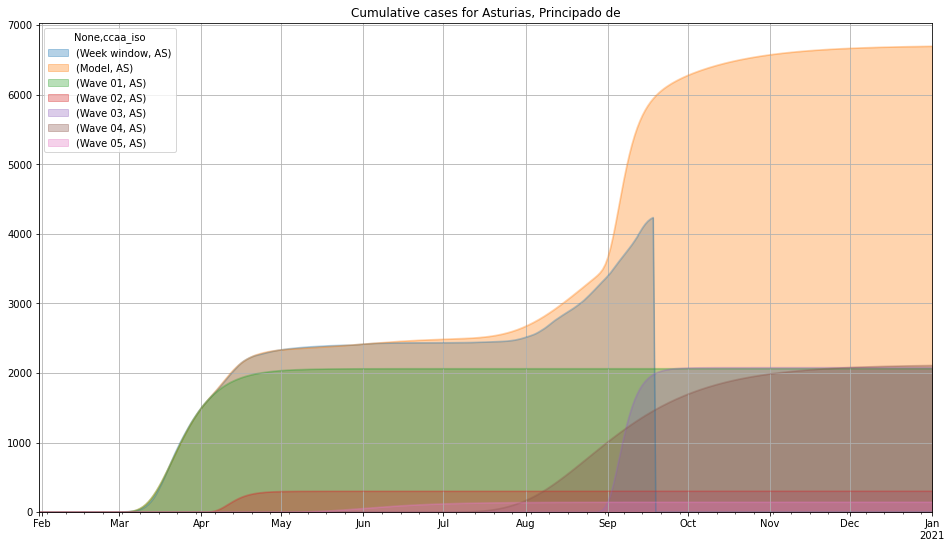

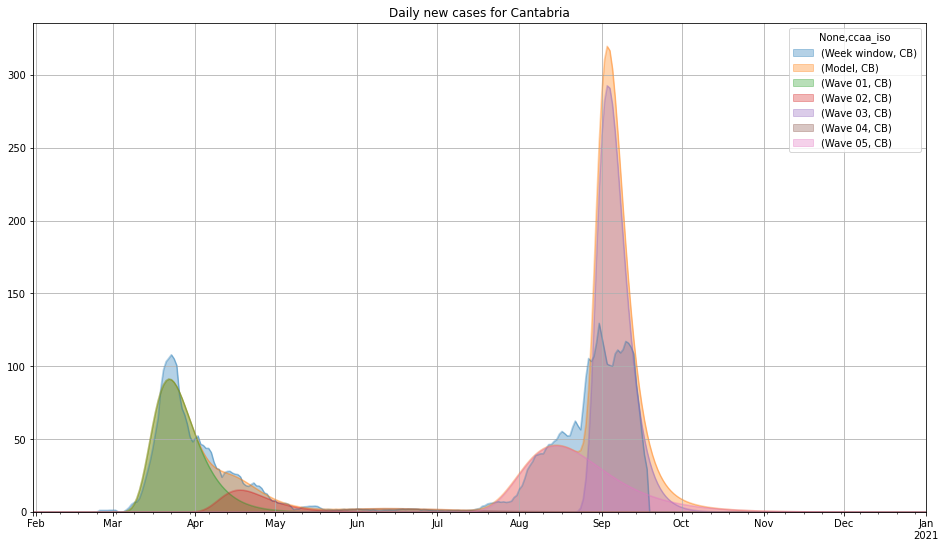

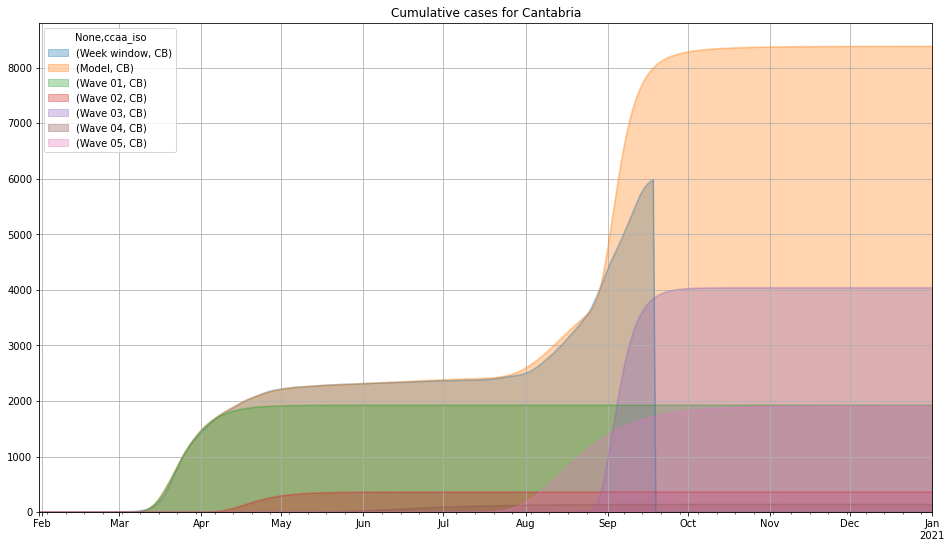

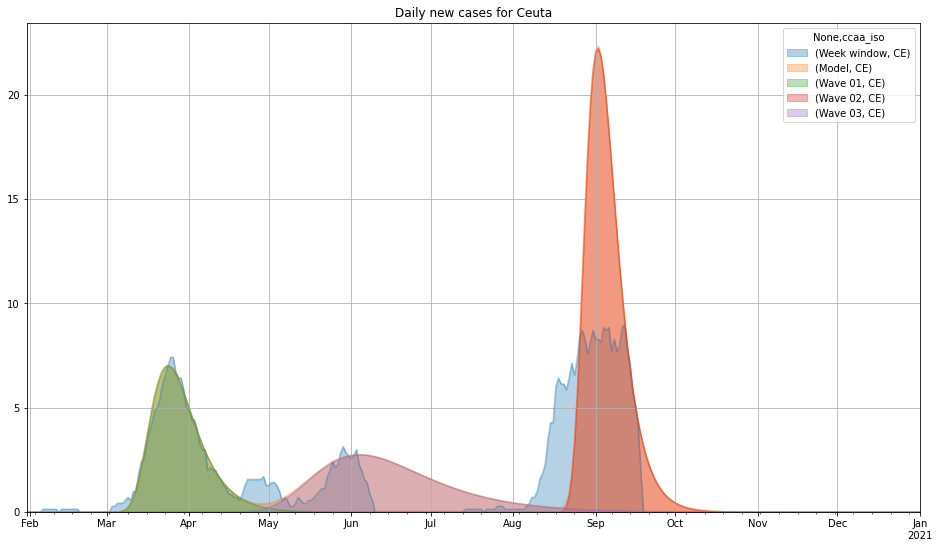

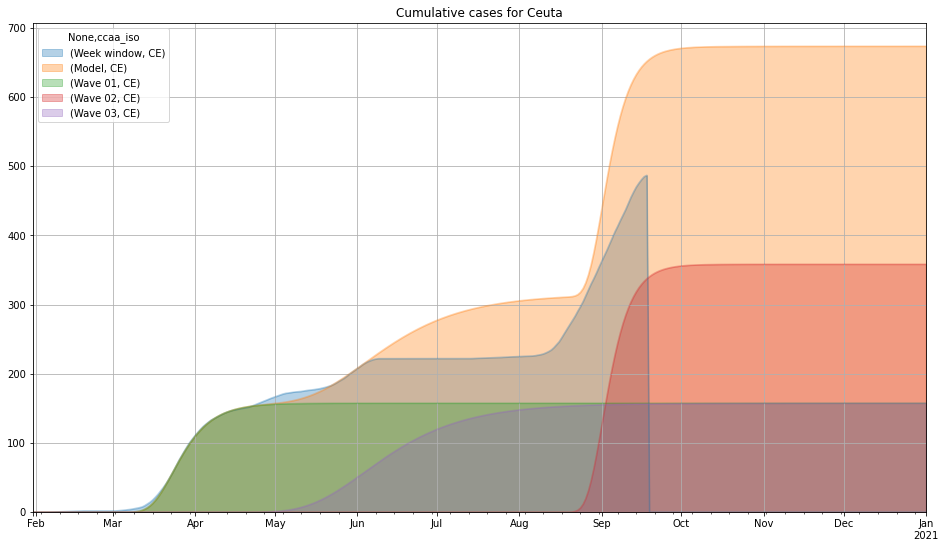

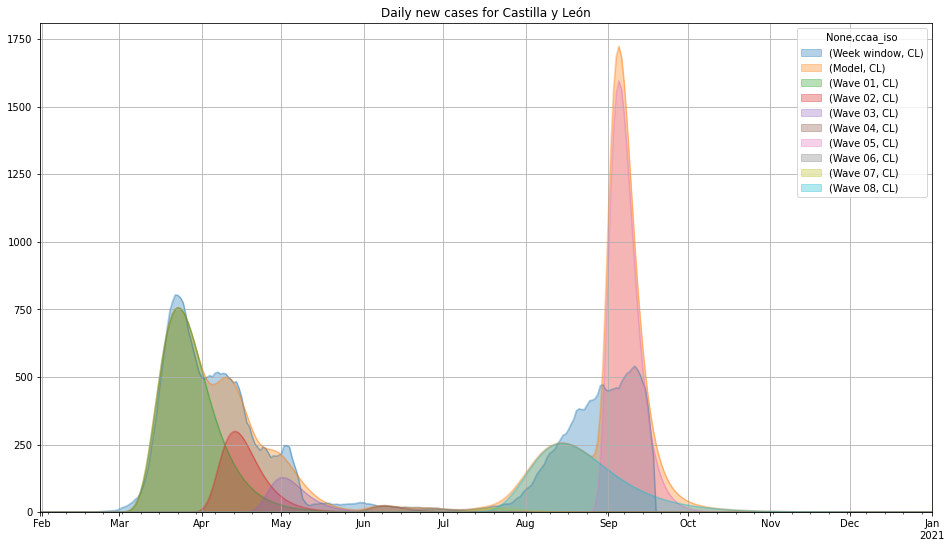

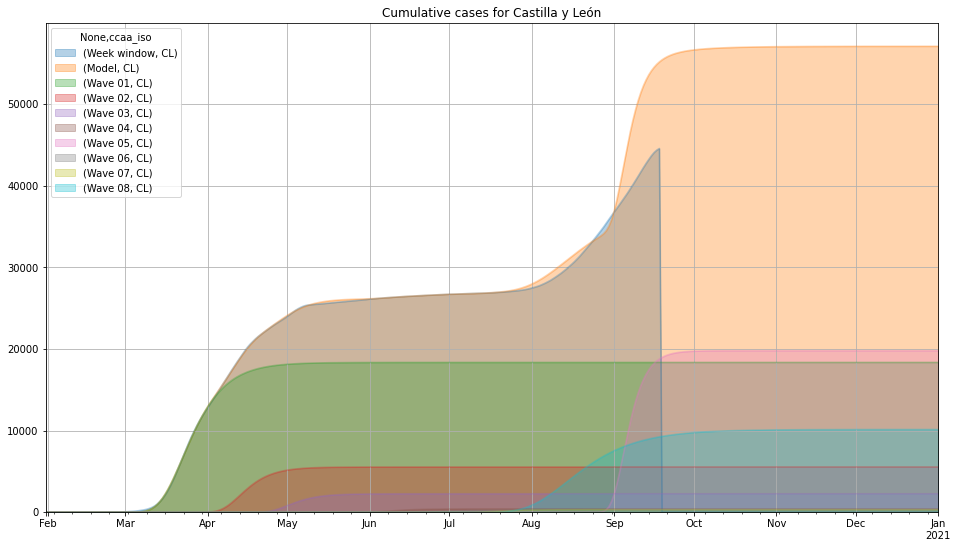

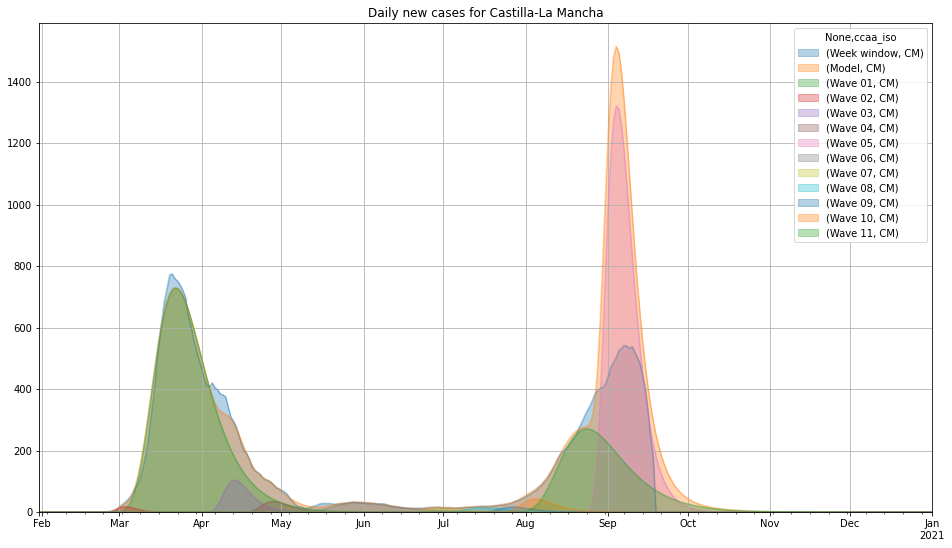

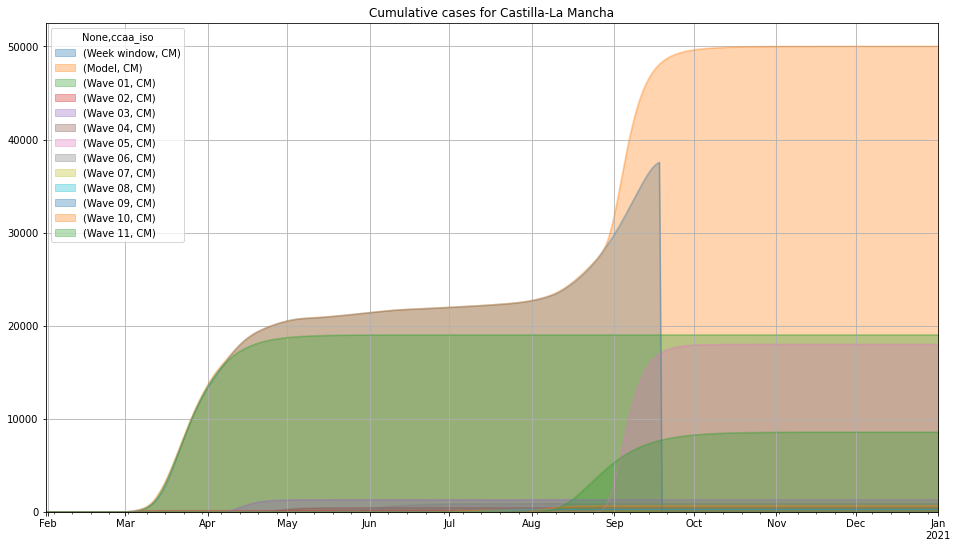

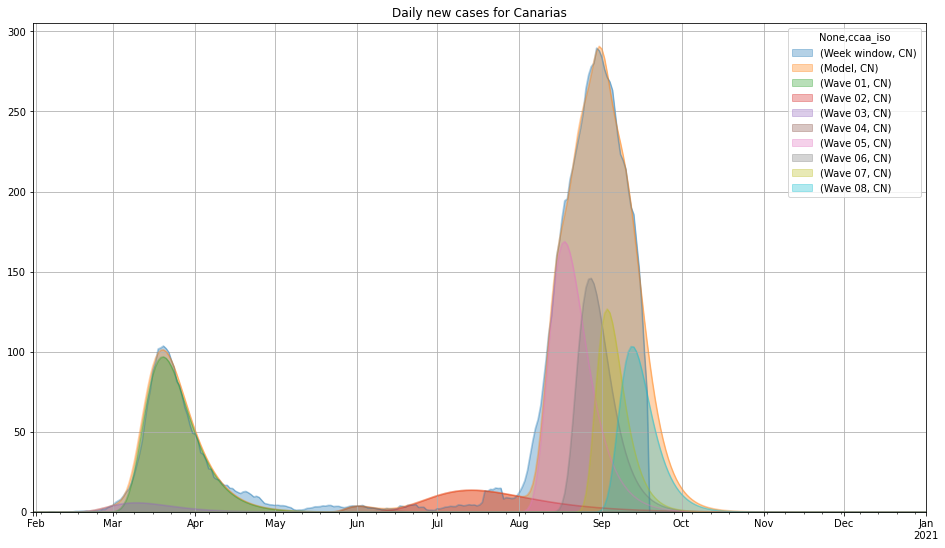

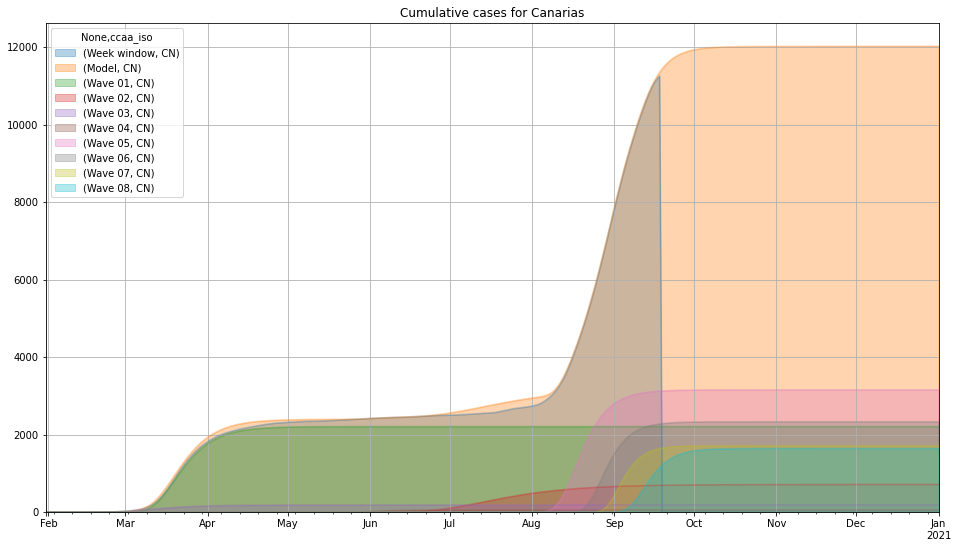

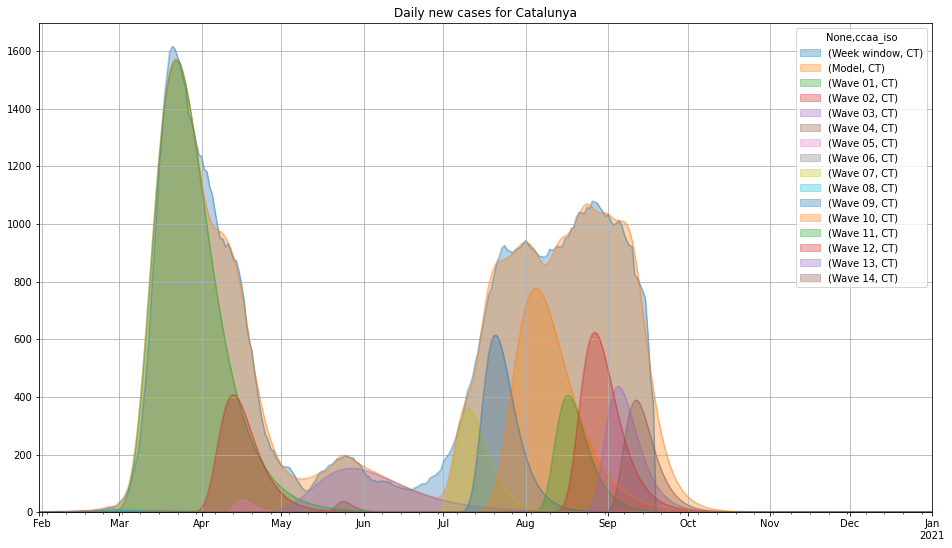

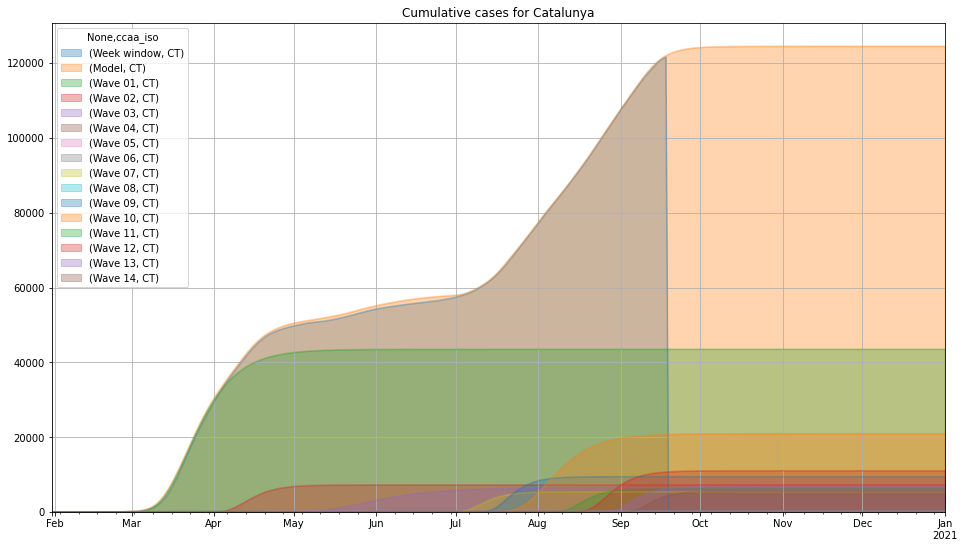

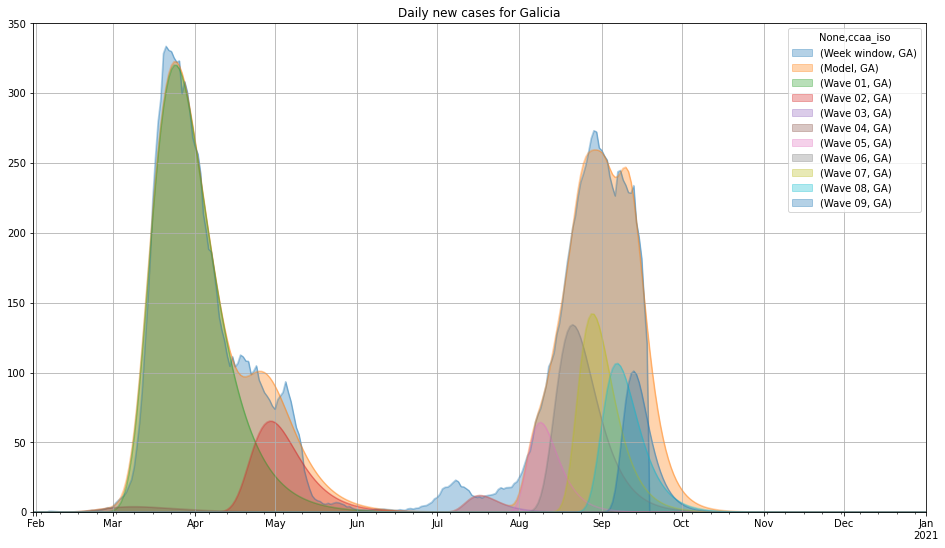

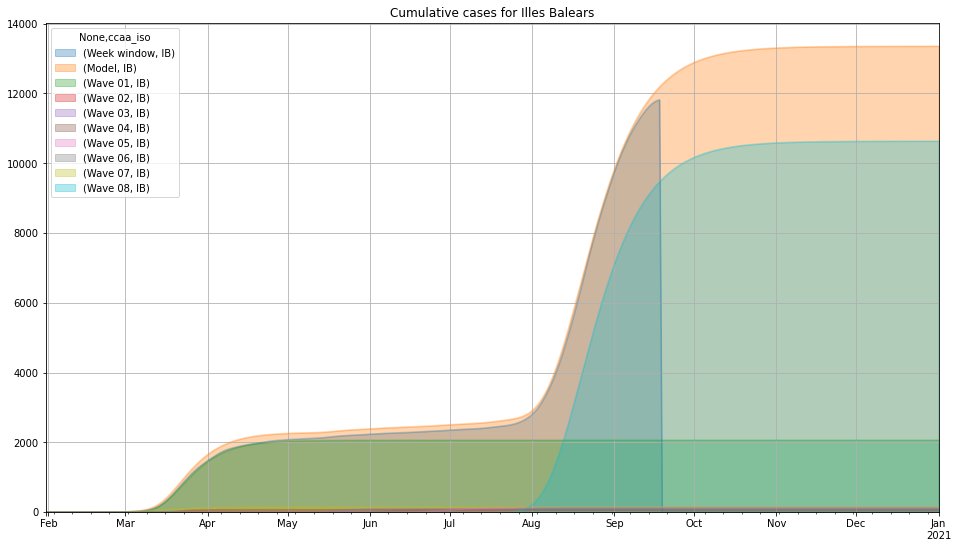

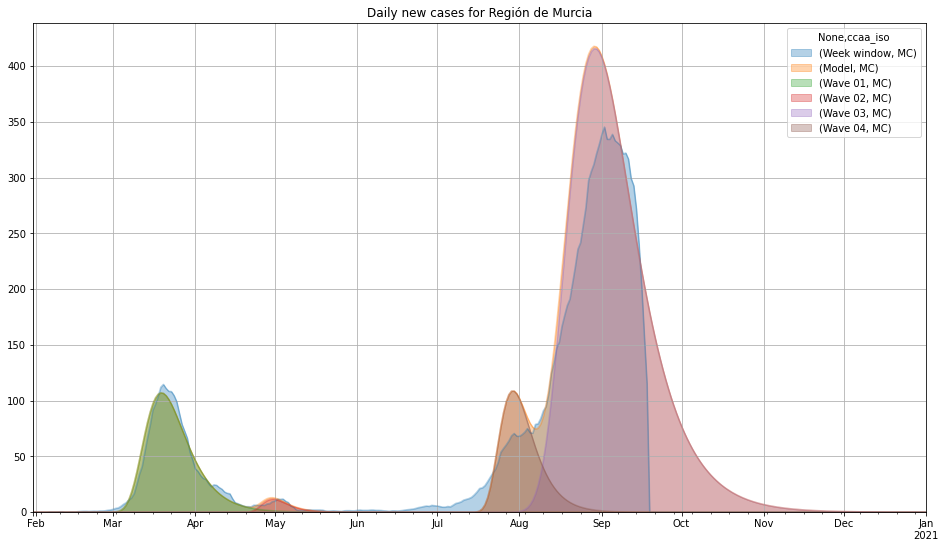

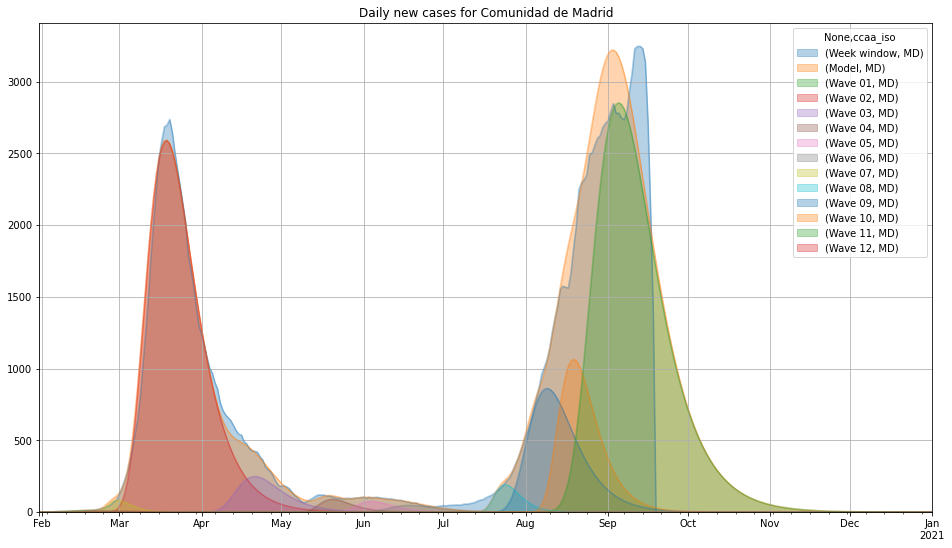

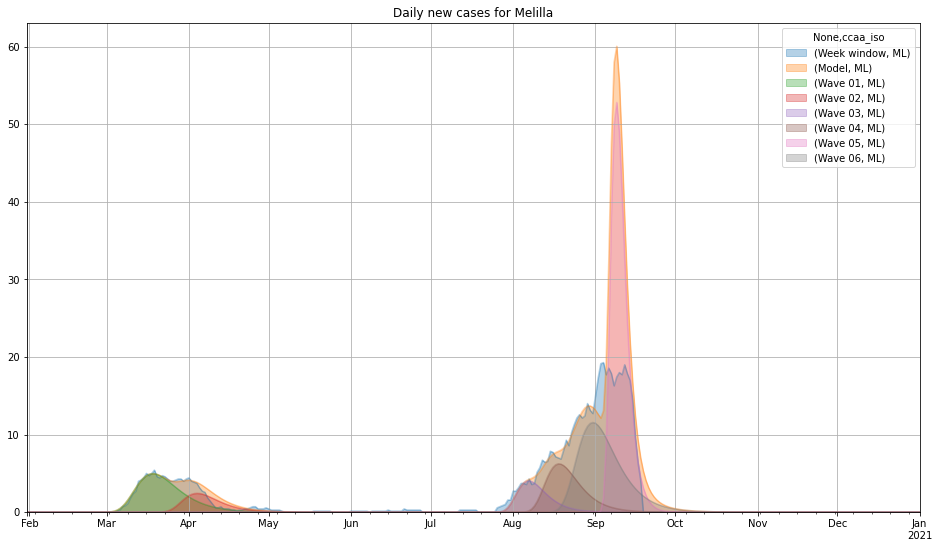

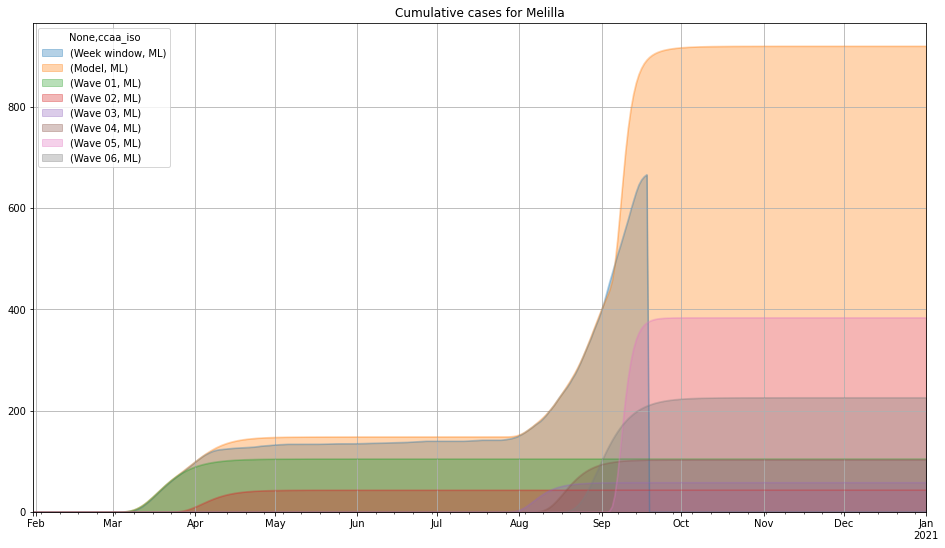

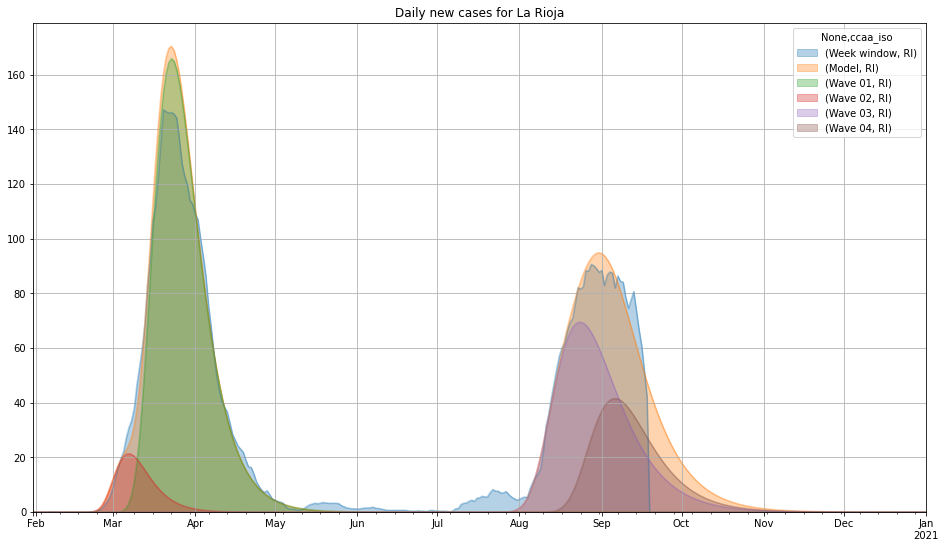

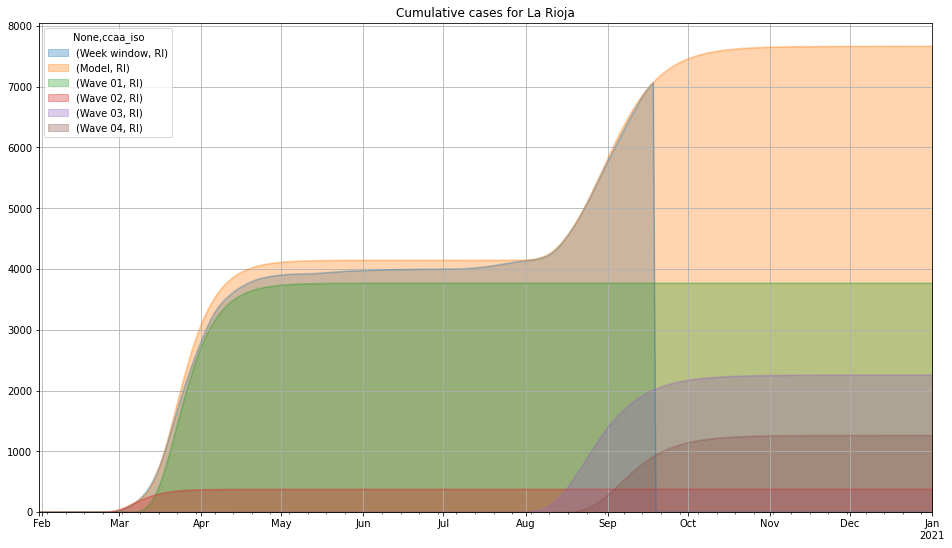

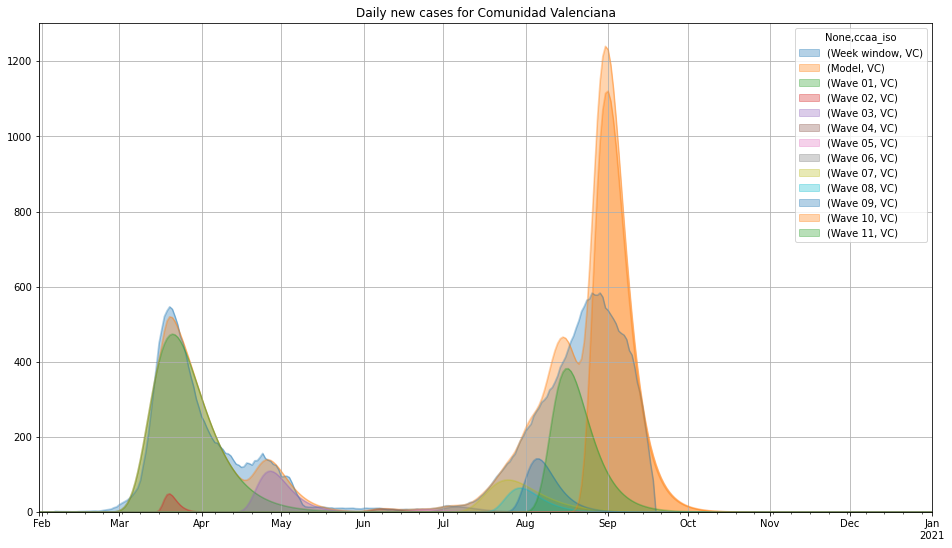

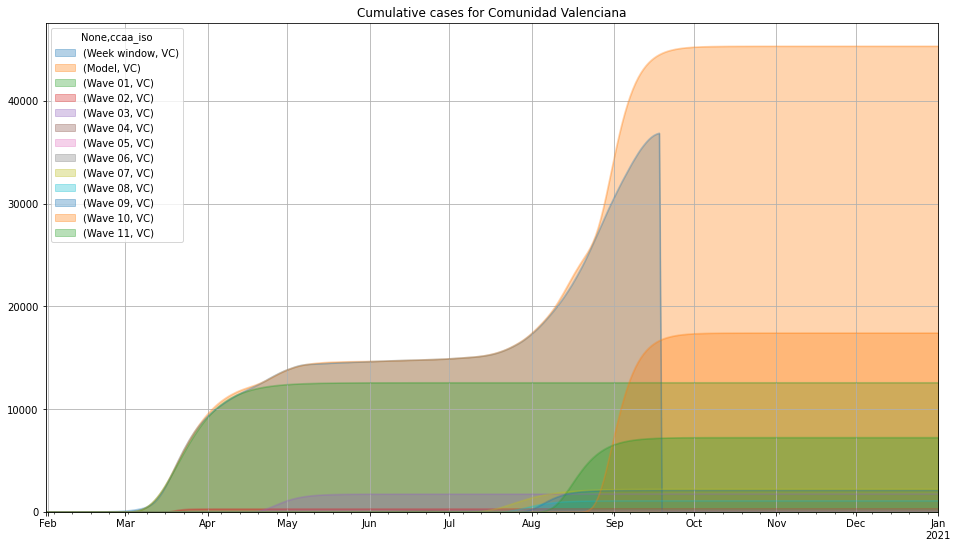

In [11]:
# Select countries to fit.
countries = np.sort(df['ccaa_iso'].unique())
#countries = ['RS', 'IL', 'US', 'UK', 'BR', 'CH', 'DE', 'IT', 'ES', 'PT', 'FR', 'SE',
#             'NO', 'DK', 'BE', 'NL', 'NZ', 'CN', 'JP', 'RU', 'AT', 'ZA', 'IN', 'KW',
#             'AU', 'BO', 'SD', 'SI']
#countries = ['BB', 'BI', 'BM', 'BZ', 'CF', 'IS', 'JE', 'LV', 'ML', 'NO', 'PF', 'VC']
#countries = ['PR']

# Choose whether to output plots per country.
showplots = True

measure  = 'num_casos'
smeasure = 'Week window' # smoothed
rmeasure = 'rcases'      # remaining
pmeasure = 'Model'       # predicted
wmeasure = 'Wave '       # waves

for country in countries:

    wave = 1

    df_geo[(pmeasure, country)] = 0
    df_geo[(smeasure, country)] = df_geo[measure][country].loc[:].rolling(7).mean()
    df_geo[(rmeasure, country)] = df_geo[smeasure][country]

    plotlist = [(smeasure, country), (pmeasure, country)]

    countryname = df_loc[df_loc['COD_CCAA'] == country]['CCAA'].iloc[0]
    #countryname = country
    popdata = 0

    #mincases = popdata / 1e6
    #mincases = 10
    #mincases = df_geo[smeasure][country].sum() / 5000
    mincases = max(popdata / 1e6, 2)

    print('Running multiple wave analysis for {} ({})'.format(
        countryname, country))
    print('Minimum number of cases is {:1.0f}'.format(mincases))

    while True:
        curwave = wmeasure + str((wave) + 1000)[-2:]
        df_geo[(curwave, country)] = 0

        df_pred = pd.DataFrame({'daynum':df_geo['daynum'],
                                measure:df_geo[rmeasure][country]})
        
        df_pred['gumdiv'] = df_pred[measure] / df_pred[measure].cumsum()
        df_pred = df_pred[(df_pred['gumdiv'] > 0) & (df_pred[measure] > mincases)]

        df_pred['linear'] = np.log(df_pred['gumdiv'])
        df_pred = df_pred[(df_pred['linear'] < -0.5) &
                          (df_pred['linear'] > -4.5)]

        if len(df_pred) <= 1:
            print('--- no data left')
            break

        eax = df_pred['daynum'].values.reshape(-1, 1)
        eay = df_pred['linear'].values.reshape(-1, 1)

        eamodel = Earth(minspan=1, penalty=0, endspan=0, thresh=1e-9, check_every=1)
        #eamodel = Earth(minspan=0)
        #eamodel = Earth()
        eamodel.fit(eax, eay)

        df_pred['earth'] = eamodel.predict(eax)

        daymin = df_pred['daynum'].min()
        daymax = df_pred['daynum'].max()

        #df_pred['gbgrad'] = np.gradient(df_pred['linear'])
        #df_pred['eagrad'] = np.gradient(df_pred['earth'])
        df_pred['gbgrad'] = df_pred['linear'] - df_pred['linear'].shift(1)
        df_pred['eagrad'] = df_pred['earth'] - df_pred['earth'].shift(1)

        fitmod = export.export_python_function(eamodel)

        df_pred['knot'] = ((abs(df_pred['eagrad'] - df_pred['eagrad'].shift(1)) > 1e-6) |
                           (df_pred['daynum'] == (daymin + 1)) |
                           (df_pred['daynum'] == daymax))
        df_pred['daycount'] = df_pred.reset_index().index

        df_knot = df_pred[df_pred['knot']][['daynum', 'daycount', 'eagrad']]
        df_knot['daysdata'] = df_knot['daycount'].shift(-1) - df_knot['daycount']
        df_knot['daystime'] = df_knot['daynum'].shift(-1) - df_knot['daynum']

        df_knot['cand'] = ((df_knot['eagrad'] < -1/30) &
                           (df_knot['daysdata'] >= 3))
        
        df_knot['since'] = df_knot['daynum'] - daymin
        df_knot['score'] = (df_knot['eagrad'] ** 2) * np.sqrt(df_knot['daysdata'] / np.sqrt(df_knot['since']))
        df_knot['choice'] = df_knot['score'] == df_knot[df_knot['cand']]['score'].max()

        choice = df_knot[df_knot['choice']]
        if len(choice) == 0:
            print('--- no data for wave')
            break

        lower = choice['daynum'].values[0]
        upper = choice['daysdata'].values[0] + lower

        df_pred = df_pred[(df_pred['daynum'] >= lower) &
                          (df_pred['daynum'] <= upper)].copy()

        slope = (fitmod([[upper]])[0] - fitmod([[lower]])[0]) / (upper - lower)
        intercept = fitmod([[lower]])[0] - (lower * slope)

        beta = - 1 / slope
        mu = beta * (intercept + np.log(beta))

        df_pred['pgumb'] = gumpdf(df_pred['daynum'], beta, mu)
        df_pred['scale'] = df_pred[measure] / df_pred['pgumb']

        final = df_pred['scale'].mean()
        fincv = df_pred['scale'].std() / final

        df_geo[(curwave, country)] = final * gumpdf(df_geo['daynum'], beta, mu)
        peak = df_geo[df_geo[(curwave, country)] == df_geo[(curwave, country)].max()].index.min()
        start = df_geo[(df_geo[(curwave, country)] >= 1) &
                       (df_geo[(curwave, country)].index < peak)].index.min()
        floor = df_geo[(df_geo[(curwave, country)] < 1) &
                       (df_geo[(curwave, country)].index > peak)].index.min()
        print('{} beta {:6.3f} mu {:3.0f} fit {:5.3f} peak {} from {} to {} size {:1.0f}'.format(
            curwave, beta, mu, (1 - fincv) ** 2, peak.date(), start.date(), floor.date(), final))
        
        df_geo[(pmeasure, country)] += df_geo[(curwave, country)]
        df_geo[(rmeasure, country)] -= df_geo[(curwave, country)]
        plotlist += [(curwave, country)]
        wave += 1
        
    if showplots:
        df_geo[plotlist].loc['20200101':'20210101'].plot(
            figsize=(16, 9),
            grid=True,
            kind='area',
            stacked=False,
            alpha=1/3,
            title='Daily new cases for '+countryname)
        df_geo[plotlist].loc['20200101':'20210101'].cumsum().plot(
            figsize=(16, 9),
            grid=True,
            kind='area',
            stacked=False,
            alpha=1/3,
            title='Cumulative cases for '+countryname)

In [12]:
df_geo.reset_index(inplace=True)

In [13]:
df_out = df_geo.melt(id_vars=['index'], value_vars=[pmeasure])
df_out.columns = (['date', 'type', 'location', 'value'])
df_out.to_csv('zzcoremc.csv')

Keep exploring! Stay home, wash your hands, keep your distance.